# 🎲 Chi-Square Test สำหรับ A/B Testing

**ผู้เขียน**: Hamdee Naseng  
**วันที่**: 3 พฤศจิกายน 2025  
**วัตถุประสงค์**: สอนการใช้ Chi-Square Test เพื่อทดสอบความแตกต่างระหว่าง 2 กลุ่มใน A/B Testing

---

## 🎯 Chi-Square Test คืออะไร?

**Chi-Square Test** (χ²) = สถิติทดสอบความเป็นอิสระระหว่างตัวแปร 2 ตัว

### 📊 ใช้เมื่อไหร่?
- เปรียบเทียบ **อัตราส่วน** (proportions) ของ 2 กลุ่ม
- ข้อมูลเป็น **categorical** (เช่น click/no click)
- ต้องการรู้ว่า 2 กลุ่ม **แตกต่างกันจริงหรือไม่**

### 🌍 ตัวอย่างจริง:
**โจทย์**: ทดสอบโฆษณา 2 แบบ (Ad A vs Ad B)
- Ad A: Click 36 ครั้ง, No Click 14 ครั้ง (CTR = 72%)
- Ad B: Click 30 ครั้ง, No Click 25 ครั้ง (CTR = 54.5%)

**คำถาม**: ความแตกต่าง 17.5% นี้เกิดจากโอกาสหรือแตกต่างจริง? 🤔

---

## 📋 Contingency Table

จัดข้อมูลในตารางแบบนี้:

```
             Click    No Click   Total
   ──────────────────────────────────────
   Ad A  │    a         b       a+b
   Ad B  │    c         d       c+d
   ──────────────────────────────────────
   Total │  a+c       b+d    a+b+c+d
```

### 🔢 สูตร Chi-Square:
$$\chi^2 = \frac{(ad - bc)^2 \times (a+b+c+d)}{(a+b)(c+d)(a+c)(b+d)}$$

**Degrees of Freedom**: df = (rows - 1) × (columns - 1) = 1

---

## 📦 Step 1: Import และตั้งค่า

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

# ตั้งค่า font สำหรับภาษาไทย
import matplotlib.font_manager as fm

font_path = '../../font/Prompt/Prompt-Regular.ttf'
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
font_name = font_prop.get_name()

plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False

print("✅ Import สำเร็จ!")
print(f"✅ ตั้งค่า Font ภาษาไทยเป็น '{font_name}' เรียบร้อย")

✅ Import สำเร็จ!
✅ ตั้งค่า Font ภาษาไทยเป็น 'Prompt' เรียบร้อย


## 🧮 Step 2: ตัวอย่างง่าย ๆ - คำนวณ Chi-Square ด้วยมือ

มาลองคำนวณ χ² ด้วยมือจาก contingency table

In [4]:
# Contingency Table ตัวอย่าง
#             Click    No Click
#   Ad A  │    36        14       (50 total)
#   Ad B  │    30        25       (55 total)

T = np.array([[36, 14],   # Ad A
              [30, 25]])  # Ad B

print("📊 Contingency Table:")
print("\n             Click    No Click   Total")
print("   ────────────────────────────────────")
print(f"   Ad A  │    {T[0,0]:2d}        {T[0,1]:2d}       {T[0].sum()}")
print(f"   Ad B  │    {T[1,0]:2d}        {T[1,1]:2d}       {T[1].sum()}")
print("   ────────────────────────────────────")
print(f"   Total │    {T[:,0].sum():2d}        {T[:,1].sum():2d}       {T.sum()}")

# คำนวณ CTR
ctr_a = T[0,0] / T[0].sum()
ctr_b = T[1,0] / T[1].sum()

print(f"\n📈 Click-Through Rate (CTR):")
print(f"   Ad A: {ctr_a:.1%}")
print(f"   Ad B: {ctr_b:.1%}")
print(f"   ความต่าง: {abs(ctr_a - ctr_b):.1%}")

📊 Contingency Table:

             Click    No Click   Total
   ────────────────────────────────────
   Ad A  │    36        14       50
   Ad B  │    30        25       55
   ────────────────────────────────────
   Total │    66        39       105

📈 Click-Through Rate (CTR):
   Ad A: 72.0%
   Ad B: 54.5%
   ความต่าง: 17.5%


## 🔢 Step 3: คำนวณ Chi-Square ด้วยสูตร

มาคำนวณ χ² ตามสูตร:
$$\chi^2 = \frac{(ad - bc)^2 \times (a+b+c+d)}{(a+b)(c+d)(a+c)(b+d)}$$

In [5]:
# วิธีที่ 1: คำนวณด้วย determinant
a, b = T[0, 0], T[0, 1]
c, d = T[1, 0], T[1, 1]

# คำนวณ determinant: ad - bc
det = a*d - b*c
print(f"🔢 คำนวณ Chi-Square:")
print(f"\n1. Determinant = ad - bc")
print(f"   = ({a}×{d}) - ({b}×{c})")
print(f"   = {a*d} - {b*c}")
print(f"   = {det}")

# คำนวณ χ²
numerator = det**2 * T.sum()
denominator = T[0].sum() * T[1].sum() * T[:,0].sum() * T[:,1].sum()
chi2_manual = numerator / denominator

print(f"\n2. χ² = det² × N / [(a+b)(c+d)(a+c)(b+d)]")
print(f"   = {det}² × {T.sum()} / [{T[0].sum()}×{T[1].sum()}×{T[:,0].sum()}×{T[:,1].sum()}]")
print(f"   = {numerator} / {denominator}")
print(f"   = {chi2_manual:.4f}")

# หา p-value
p_value = 1 - chi2.cdf(x=chi2_manual, df=1)
print(f"\n3. P-value = 1 - CDF(χ², df=1)")
print(f"   = 1 - CDF({chi2_manual:.4f}, df=1)")
print(f"   = {p_value:.4f}")

print(f"\n📊 สรุป:")
print(f"   χ² = {chi2_manual:.4f}")
print(f"   p-value = {p_value:.4f}")
print(f"   {'✅ แตกต่างกันอย่างมีนัยสำคัญ!' if p_value < 0.05 else '❌ ไม่แตกต่างกันอย่างมีนัยสำคัญ'}")

🔢 คำนวณ Chi-Square:

1. Determinant = ad - bc
   = (36×25) - (14×30)
   = 900 - 420
   = 480

2. χ² = det² × N / [(a+b)(c+d)(a+c)(b+d)]
   = 480² × 105 / [50×55×66×39]
   = 24192000 / 7078500
   = 3.4177

3. P-value = 1 - CDF(χ², df=1)
   = 1 - CDF(3.4177, df=1)
   = 0.0645

📊 สรุป:
   χ² = 3.4177
   p-value = 0.0645
   ❌ ไม่แตกต่างกันอย่างมีนัยสำคัญ


## 🔧 Step 4: ใช้ Scipy (วิธีสะดวก)

แทนที่จะคำนวณเอง เราใช้ `chi2_contingency()` จาก scipy

In [6]:
# ใช้ scipy คำนวณ
chi2_scipy, p_scipy, dof, expected = chi2_contingency(T, correction=False)

print("🔧 ใช้ scipy.stats.chi2_contingency():")
print(f"\n   χ² = {chi2_scipy:.4f}")
print(f"   p-value = {p_scipy:.4f}")
print(f"   degrees of freedom = {dof}")

print(f"\n📋 Expected Frequencies (ถ้า H₀ เป็นจริง):")
print("\n             Click    No Click")
print("   ──────────────────────────────")
print(f"   Ad A  │  {expected[0,0]:6.2f}    {expected[0,1]:6.2f}")
print(f"   Ad B  │  {expected[1,0]:6.2f}    {expected[1,1]:6.2f}")

print(f"\n📊 เปรียบเทียบ Observed vs Expected:")
print(f"\n   Ad A Click: {T[0,0]} (observed) vs {expected[0,0]:.2f} (expected)")
print(f"   Ad B Click: {T[1,0]} (observed) vs {expected[1,0]:.2f} (expected)")

print(f"\n✅ ตรวจสอบ: Manual = {chi2_manual:.4f}, Scipy = {chi2_scipy:.4f}")
print(f"   {'✓ ตรงกัน!' if abs(chi2_manual - chi2_scipy) < 0.001 else '✗ ไม่ตรงกัน'}")

🔧 ใช้ scipy.stats.chi2_contingency():

   χ² = 3.4177
   p-value = 0.0645
   degrees of freedom = 1

📋 Expected Frequencies (ถ้า H₀ เป็นจริง):

             Click    No Click
   ──────────────────────────────
   Ad A  │   31.43     18.57
   Ad B  │   34.57     20.43

📊 เปรียบเทียบ Observed vs Expected:

   Ad A Click: 36 (observed) vs 31.43 (expected)
   Ad B Click: 30 (observed) vs 34.57 (expected)

✅ ตรวจสอบ: Manual = 3.4177, Scipy = 3.4177
   ✓ ตรงกัน!


## 🎲 Step 5: Class DataGenerator - สร้างข้อมูลจำลอง

Class นี้ใช้สร้างข้อมูล A/B testing จำลอง

In [7]:
class DataGenerator:
    """สร้างข้อมูล clicks จำลองสำหรับ 2 ads"""
    def __init__(self, p1, p2):
        self.p1 = p1  # Click probability ของ Ad 1
        self.p2 = p2  # Click probability ของ Ad 2
    
    def next(self):
        """สุ่มผลลัพธ์ 1 ครั้งสำหรับทั้ง 2 ads"""
        click1 = 1 if (np.random.random() < self.p1) else 0
        click2 = 1 if (np.random.random() < self.p2) else 0
        return click1, click2

# ทดสอบ DataGenerator
data_gen = DataGenerator(p1=0.1, p2=0.11)

print("🎲 ทดสอบ DataGenerator:")
print(f"   p1 (Ad 1) = {data_gen.p1:.0%}")
print(f"   p2 (Ad 2) = {data_gen.p2:.0%}")
print(f"\n📊 ทดลองสุ่ม 10 ครั้ง:")
print("   ครั้งที่   Ad1   Ad2")
print("   ───────────────────")
for i in range(10):
    c1, c2 = data_gen.next()
    print(f"     {i+1:2d}      {c1}     {c2}")

print(f"\n💡 1 = Click, 0 = No Click")

🎲 ทดสอบ DataGenerator:
   p1 (Ad 1) = 10%
   p2 (Ad 2) = 11%

📊 ทดลองสุ่ม 10 ครั้ง:
   ครั้งที่   Ad1   Ad2
   ───────────────────
      1      0     0
      2      0     0
      3      0     0
      4      0     0
      5      0     0
      6      0     0
      7      0     0
      8      0     0
      9      0     0
     10      0     0

💡 1 = Click, 0 = No Click


## 📈 Step 6: ฟังก์ชัน get_p_value - คำนวณ p-value

ฟังก์ชันนี้คำนวณ p-value จาก contingency table

In [8]:
def get_p_value(T):
    """คำนวณ p-value จาก contingency table"""
    # คำนวณ determinant
    det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
    
    # คำนวณ χ²
    c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
    
    # คำนวณ p-value
    p = 1 - chi2.cdf(x=c2, df=1)
    
    return p

# ทดสอบฟังก์ชัน
test_table = np.array([[36, 14], [30, 25]])
p_test = get_p_value(test_table)

print("🔧 ทดสอบฟังก์ชัน get_p_value():")
print(f"\nInput:")
print(test_table)
print(f"\nOutput:")
print(f"   p-value = {p_test:.4f}")
print(f"   {'✅ Significant (p < 0.05)' if p_test < 0.05 else '❌ Not Significant (p ≥ 0.05)'}")

🔧 ทดสอบฟังก์ชัน get_p_value():

Input:
[[36 14]
 [30 25]]

Output:
   p-value = 0.0645
   ❌ Not Significant (p ≥ 0.05)


## 🚀 Step 7: ฟังก์ชัน run_experiment - การทดลองแบบเต็ม

ฟังก์ชันนี้จำลอง A/B testing และคำนวณ p-value ในทุก ๆ รอบ

### 🎯 จุดประสงค์:
- ดูว่า p-value เปลี่ยนแปลงอย่างไรเมื่อเวลาผ่านไป
- เมื่อไหร่ p-value จะต่ำกว่า 0.05 (significant)
- ต้องใช้ตัวอย่างกี่ตัวถึงจะแยกแยะได้

In [9]:
def run_experiment(p1, p2, N):
    """
    รันการทดลอง A/B testing N รอบ
    
    Parameters:
    -----------
    p1 : float
        Click probability ของ Ad 1
    p2 : float
        Click probability ของ Ad 2
    N : int
        จำนวนรอบการทดลอง
    """
    # สร้าง data generator
    data = DataGenerator(p1, p2)
    
    # เตรียมตัวแปร
    p_values = np.empty(N)
    T = np.zeros((2, 2)).astype(np.float32)
    
    # รันการทดลอง N รอบ
    for i in range(N):
        # สุ่มผลลัพธ์ 1 ครั้ง
        c1, c2 = data.next()
        
        # อัพเดท contingency table
        T[0, c1] += 1  # Ad 1: เพิ่ม click หรือ no-click
        T[1, c2] += 1  # Ad 2: เพิ่ม click หรือ no-click
        
        # คำนวณ p-value (ข้าม 10 รอบแรก เพราะข้อมูลน้อยเกินไป)
        if i < 10:
            p_values[i] = None
        else:
            p_values[i] = get_p_value(T)
    
    # วาดกราฟ
    plt.figure(figsize=(14, 6))
    
    plt.plot(p_values, linewidth=2, label='P-value')
    plt.axhline(0.05, color='r', linestyle='--', linewidth=2, label='α = 0.05 (significance level)')
    
    plt.xlabel('จำนวนตัวอย่าง (N)', fontsize=12)
    plt.ylabel('P-value', fontsize=12)
    plt.title(f'P-value เมื่อเวลาผ่านไป | p₁={p1:.0%}, p₂={p2:.0%}', fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    plt.ylim(0, 0.5)
    
    plt.tight_layout()
    plt.show()
    
    # แสดงสถิติสรุป
    print(f"\n📊 สรุปการทดลอง:")
    print(f"   จำนวนรอบ: {N:,}")
    print(f"   p₁ (Ad 1): {p1:.1%}")
    print(f"   p₂ (Ad 2): {p2:.1%}")
    print(f"   ความแตกต่างจริง: {abs(p2-p1):.1%}")
    
    print(f"\n📋 Contingency Table ท้ายสุด:")
    print("\n             Click      No Click   Total")
    print("   ──────────────────────────────────────")
    print(f"   Ad 1  │  {T[0,0]:6.0f}     {T[0,1]:7.0f}   {T[0].sum():.0f}")
    print(f"   Ad 2  │  {T[1,0]:6.0f}     {T[1,1]:7.0f}   {T[1].sum():.0f}")
    
    ctr1 = T[0,0] / T[0].sum()
    ctr2 = T[1,0] / T[1].sum()
    print(f"\n📈 CTR สังเกตได้:")
    print(f"   Ad 1: {ctr1:.2%}")
    print(f"   Ad 2: {ctr2:.2%}")
    print(f"   ความแตกต่าง: {abs(ctr2-ctr1):.2%}")
    
    final_p = get_p_value(T)
    print(f"\n🎯 P-value สุดท้าย: {final_p:.4f}")
    print(f"   {'✅ แตกต่างกันอย่างมีนัยสำคัญ!' if final_p < 0.05 else '❌ ไม่แตกต่างกันอย่างมีนัยสำคัญ'}")
    
    # หาจุดที่ significant ครั้งแรก
    significant_indices = np.where(p_values < 0.05)[0]
    if len(significant_indices) > 0:
        first_sig = significant_indices[0]
        print(f"\n💡 P-value < 0.05 ครั้งแรกที่: รอบที่ {first_sig} (ใช้ตัวอย่าง {first_sig} ตัว)")
    else:
        print(f"\n💡 P-value ไม่เคยต่ำกว่า 0.05 เลย (ความแตกต่างน้อยเกินไป!)")

print("✅ สร้างฟังก์ชัน run_experiment เรียบร้อย!")

✅ สร้างฟังก์ชัน run_experiment เรียบร้อย!


## 🧪 Step 8: ทดลอง 1 - ความแตกต่างน้อย (p₁=10%, p₂=11%)

**สถานการณ์**: Ad 2 ดีกว่า Ad 1 เพียง **1%** เท่านั้น

**คาดหวัง**: ต้องใช้ตัวอย่างเยอะมากถึงจะแยกแยะได้

🧪 ทดลองที่ 1: ความแตกต่างน้อยมาก


C:\Users\imed-\AppData\Local\Temp\ipykernel_10916\1868547456.py:49: UserWarning: Glyph 945 (\N{GREEK SMALL LETTER ALPHA}) missing from font(s) Prompt.
  plt.tight_layout()
d:\imed-\GitHub\Naive-Bayes\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 945 (\N{GREEK SMALL LETTER ALPHA}) missing from font(s) Prompt.
  fig.canvas.print_figure(bytes_io, **kw)


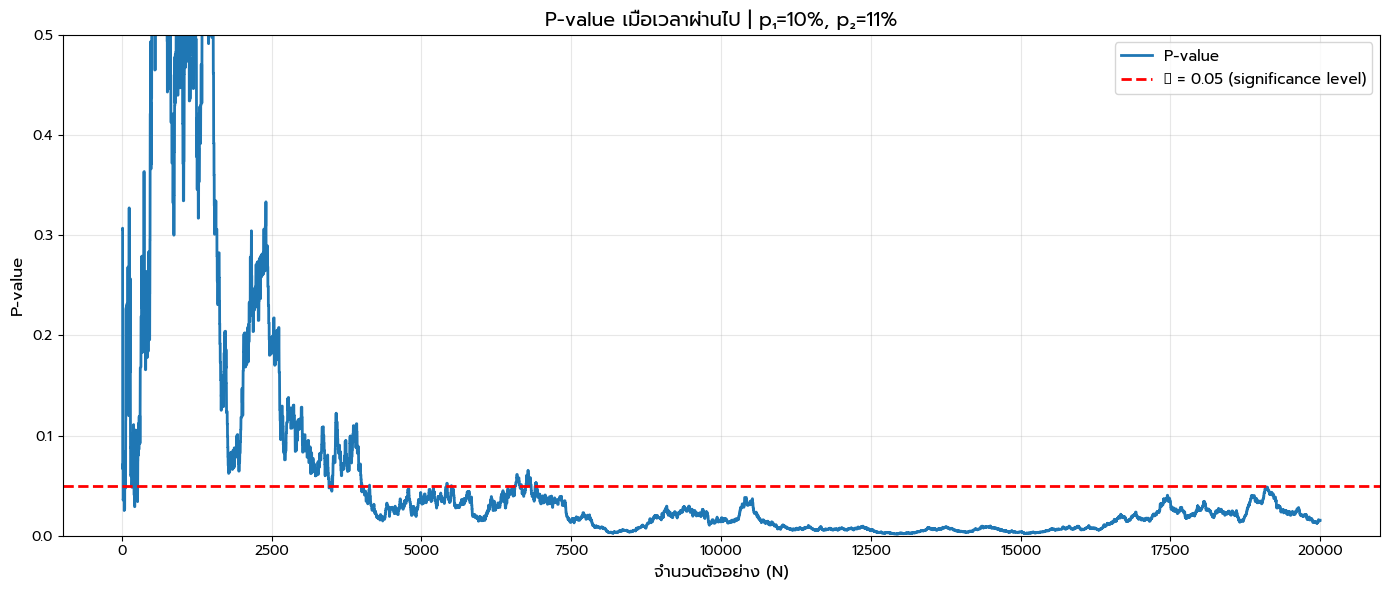


📊 สรุปการทดลอง:
   จำนวนรอบ: 20,000
   p₁ (Ad 1): 10.0%
   p₂ (Ad 2): 11.0%
   ความแตกต่างจริง: 1.0%

📋 Contingency Table ท้ายสุด:

             Click      No Click   Total
   ──────────────────────────────────────
   Ad 1  │   18022        1978   20000
   Ad 2  │   17875        2125   20000

📈 CTR สังเกตได้:
   Ad 1: 90.11%
   Ad 2: 89.38%
   ความแตกต่าง: 0.73%

🎯 P-value สุดท้าย: 0.0154
   ✅ แตกต่างกันอย่างมีนัยสำคัญ!

💡 P-value < 0.05 ครั้งแรกที่: รอบที่ 20 (ใช้ตัวอย่าง 20 ตัว)


In [10]:
# ทดลองที่ 1: ความแตกต่างน้อย
print("🧪 ทดลองที่ 1: ความแตกต่างน้อยมาก")
print("="*60)
run_experiment(p1=0.1, p2=0.11, N=20000)

## 🧪 Step 9: ทดลอง 2 - ความแตกต่างปานกลาง (p₁=10%, p₂=15%)

**สถานการณ์**: Ad 2 ดีกว่า Ad 1 ถึง **5%**

**คาดหวัง**: ใช้ตัวอย่างน้อยกว่าทดลองที่ 1

🧪 ทดลองที่ 2: ความแตกต่างปานกลาง


C:\Users\imed-\AppData\Local\Temp\ipykernel_10916\1868547456.py:49: UserWarning: Glyph 945 (\N{GREEK SMALL LETTER ALPHA}) missing from font(s) Prompt.
  plt.tight_layout()


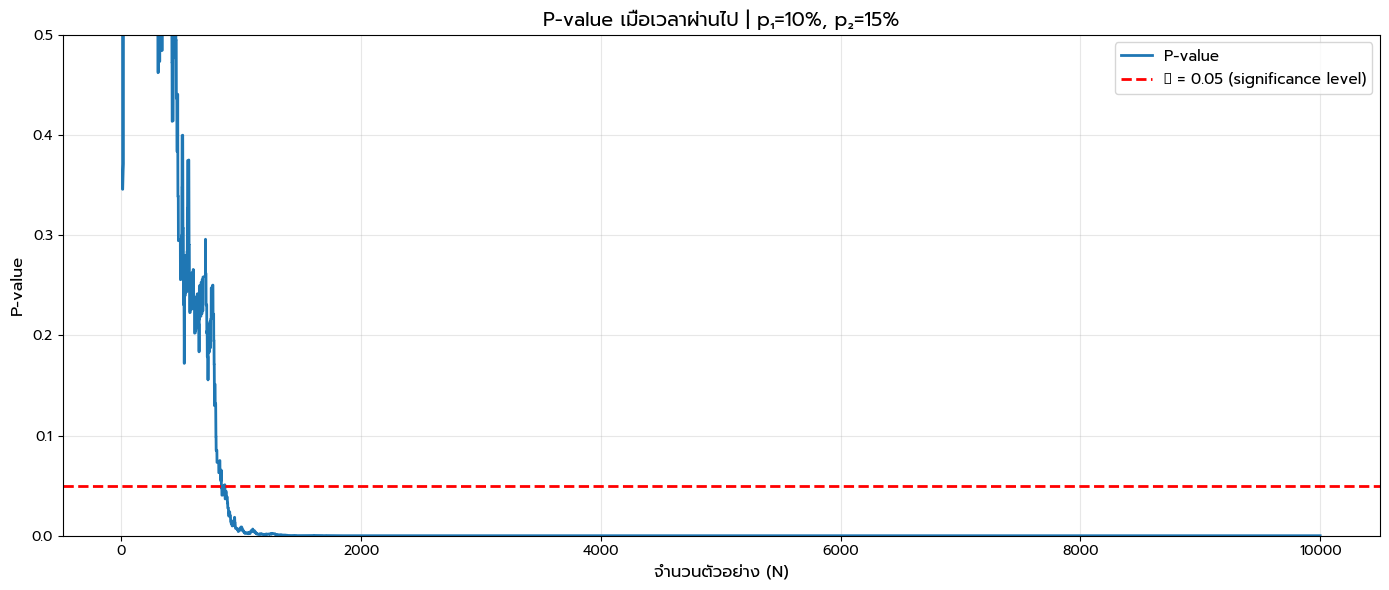


📊 สรุปการทดลอง:
   จำนวนรอบ: 10,000
   p₁ (Ad 1): 10.0%
   p₂ (Ad 2): 15.0%
   ความแตกต่างจริง: 5.0%

📋 Contingency Table ท้ายสุด:

             Click      No Click   Total
   ──────────────────────────────────────
   Ad 1  │    9006         994   10000
   Ad 2  │    8512        1488   10000

📈 CTR สังเกตได้:
   Ad 1: 90.06%
   Ad 2: 85.12%
   ความแตกต่าง: 4.94%

🎯 P-value สุดท้าย: 0.0000
   ✅ แตกต่างกันอย่างมีนัยสำคัญ!

💡 P-value < 0.05 ครั้งแรกที่: รอบที่ 835 (ใช้ตัวอย่าง 835 ตัว)


In [11]:
# ทดลองที่ 2: ความแตกต่างปานกลาง
print("🧪 ทดลองที่ 2: ความแตกต่างปานกลาง")
print("="*60)
run_experiment(p1=0.1, p2=0.15, N=10000)

## 🧪 Step 10: ทดลอง 3 - ความแตกต่างมาก (p₁=10%, p₂=20%)

**สถานการณ์**: Ad 2 ดีกว่า Ad 1 ถึง **10%** (เป็น 2 เท่า!)

**คาดหวัง**: แยกแยะได้ง่ายและเร็ว

🧪 ทดลองที่ 3: ความแตกต่างมาก


C:\Users\imed-\AppData\Local\Temp\ipykernel_10916\716838489.py:7: RuntimeWarning: invalid value encountered in scalar divide
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
C:\Users\imed-\AppData\Local\Temp\ipykernel_10916\1868547456.py:49: UserWarning: Glyph 945 (\N{GREEK SMALL LETTER ALPHA}) missing from font(s) Prompt.
  plt.tight_layout()
C:\Users\imed-\AppData\Local\Temp\ipykernel_10916\1868547456.py:49: UserWarning: Glyph 945 (\N{GREEK SMALL LETTER ALPHA}) missing from font(s) Prompt.
  plt.tight_layout()


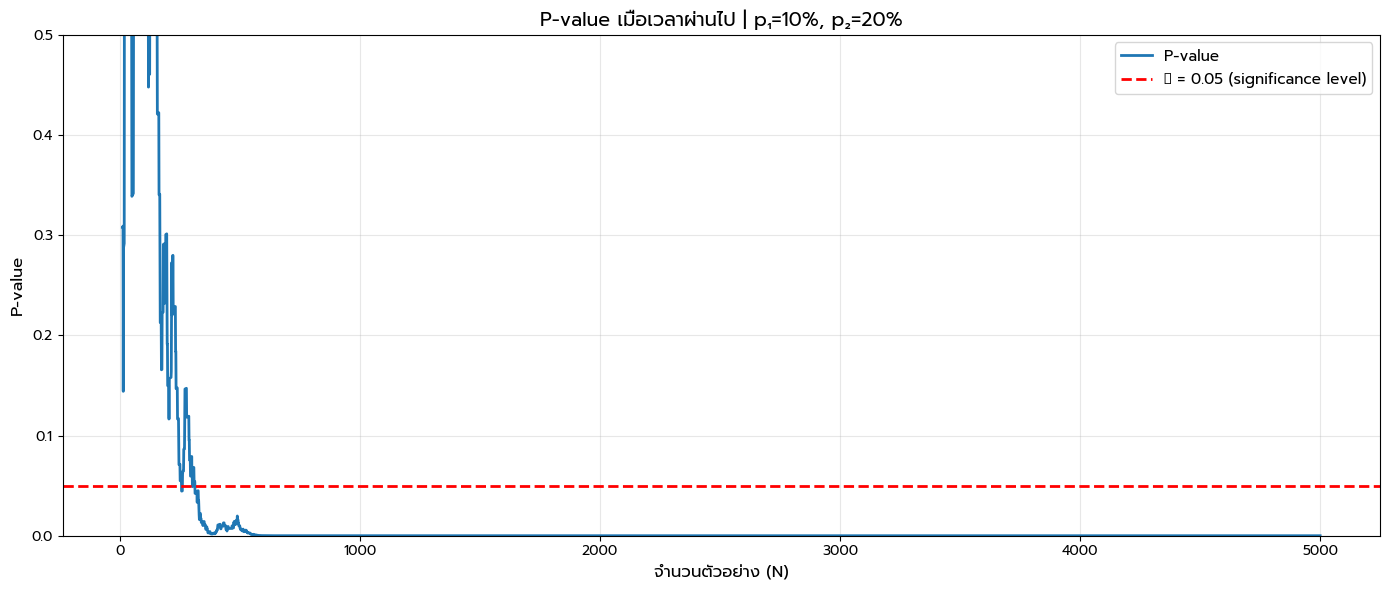


📊 สรุปการทดลอง:
   จำนวนรอบ: 5,000
   p₁ (Ad 1): 10.0%
   p₂ (Ad 2): 20.0%
   ความแตกต่างจริง: 10.0%

📋 Contingency Table ท้ายสุด:

             Click      No Click   Total
   ──────────────────────────────────────
   Ad 1  │    4486         514   5000
   Ad 2  │    3994        1006   5000

📈 CTR สังเกตได้:
   Ad 1: 89.72%
   Ad 2: 79.88%
   ความแตกต่าง: 9.84%

🎯 P-value สุดท้าย: 0.0000
   ✅ แตกต่างกันอย่างมีนัยสำคัญ!

💡 P-value < 0.05 ครั้งแรกที่: รอบที่ 258 (ใช้ตัวอย่าง 258 ตัว)


In [12]:
# ทดลองที่ 3: ความแตกต่างมาก
print("🧪 ทดลองที่ 3: ความแตกต่างมาก")
print("="*60)
run_experiment(p1=0.1, p2=0.20, N=5000)

## 🎓 สรุป: สิ่งที่เราได้เรียนรู้

### 🔑 แนวคิดหลัก (Key Concepts):

#### 1. **Chi-Square Test (χ²)**
- ทดสอบความเป็นอิสระระหว่างตัวแปร 2 ตัว
- ใช้กับข้อมูล categorical (เช่น click/no click)
- เหมาะสำหรับ A/B testing

**สูตร**:
$$\chi^2 = \frac{(ad - bc)^2 \times (a+b+c+d)}{(a+b)(c+d)(a+c)(b+d)}$$

#### 2. **Contingency Table**
```
             Click    No Click
   ──────────────────────────
   Ad A  │    a         b
   Ad B  │    c         d
```
จัดระเบียบข้อมูลเพื่อคำนวณ χ²

#### 3. **P-value**
- P(data | H₀ เป็นจริง)
- ถ้า p < 0.05 → ปฏิเสธ H₀ → **แตกต่างกันอย่างมีนัยสำคัญ**
- ถ้า p ≥ 0.05 → ยอมรับ H₀ → **ไม่แตกต่างกันอย่างมีนัยสำคัญ**

#### 4. **Sample Size ที่ต้องการ**
ขึ้นอยู่กับ **Effect Size** (ความแตกต่างที่แท้จริง):

| ความแตกต่าง | Effect Size | ตัวอย่างที่ต้องการ |
|-------------|-------------|-----------------|
| 1% (10% vs 11%) | เล็กมาก | ~15,000+ |
| 5% (10% vs 15%) | ปานกลาง | ~3,000 |
| 10% (10% vs 20%) | ใหญ่ | ~500 |

**กฎทั่วไป**: ยิ่งความแตกต่างน้อย → ต้องใช้ตัวอย่างมากขึ้น

#### 5. **การตีความกราฟ P-value**
- **ลดลงเรื่อย ๆ**: มีหลักฐานว่าแตกต่างกันจริง
- **แกว่งไปมา**: ยังไม่มีหลักฐานชัดเจน (ต้องเพิ่มตัวอย่าง)
- **ต่ำกว่า 0.05**: Statistically significant!

### 📊 Code Snippets สำคัญ:

```python
# 1. คำนวณ Chi-Square ด้วยมือ
det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
chi2_value = det**2 * T.sum() / (T[0].sum() * T[1].sum() * T[:,0].sum() * T[:,1].sum())
p_value = 1 - chi2.cdf(chi2_value, df=1)

# 2. ใช้ Scipy (สะดวกกว่า)
chi2_value, p_value, dof, expected = chi2_contingency(T, correction=False)
```

### ⚠️ ข้อควรระวัง:

1. **Early Stopping**: อย่าหยุดทดลองทันทีที่ p < 0.05 ครั้งแรก
   - P-value อาจแกว่งไปมาในช่วงแรก
   - ควรกำหนดขนาดตัวอย่างล่วงหน้า (a priori)

2. **Multiple Comparisons**: ถ้าทดสอบหลายครั้ง ต้องปรับ α
   - Bonferroni correction: α/n
   - False Discovery Rate (FDR)

3. **Assumptions**:
   - Expected frequency ≥ 5 ในทุกช่อง
   - ตัวอย่างสุ่มอย่างอิสระ
   - ตัวแปรเป็น categorical

### 🆚 Chi-Square vs Bayesian A/B Testing:

| Aspect | Chi-Square | Bayesian |
|--------|------------|----------|
| **Output** | P-value (ปฏิเสธ H₀ หรือไม่) | Posterior distribution |
| **Flexibility** | ต้องกำหนด N ล่วงหน้า | ยืดหยุ่น (sequential) |
| **Interpretation** | มีนัยสำคัญหรือไม่ | ความน่าจะเป็นที่ A ดีกว่า B |
| **Early Stopping** | อันตราย | ปลอดภัย |

### 🌍 ประยุกต์ใช้:

1. **A/B Testing**:
   - เปรียบเทียบ 2 เวอร์ชันของ website/app
   - Click-through rate, Conversion rate

2. **Medical Research**:
   - เปรียบเทียบประสิทธิภาพของยา 2 ชนิด
   - Success rate ของการรักษา

3. **Quality Control**:
   - เปรียบเทียบ defect rate ของ 2 โรงงาน
   - ผลกระทบของ process change

4. **Marketing**:
   - เปรียบเทียบ response rate ของโฆษณา
   - Effectiveness ของ campaigns

---

## 🎉 ยินดีด้วย!

คุณเข้าใจ **Chi-Square Test สำหรับ A/B Testing** แล้ว!  
นี่คือเครื่องมือทางสถิติที่สำคัญมากในการตัดสินใจ! 💪

**Next Steps**:
- เปรียบเทียบกับ **t-test** (สำหรับ continuous data)
- เรียนรู้ **Bayesian A/B Testing** (ยืดหยุ่นกว่า)
- ศึกษา **Power Analysis** (คำนวณ sample size ที่ต้องการ)
- ทดลองกับ **Multi-Armed Bandit** (optimize ระหว่างทดลอง)

---